In [1]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.wcs import WCS
from astropy.io import fits

from matplotlib.colors import LogNorm

from astropy.utils.data import download_file

catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

myTab=Table.read(catalog_path+'a100-nsa-for-adap.fits')

In [2]:
# SNR cut: GALEX NUV or WISE 12um SNR > 20
snrmin = 20
W3snr = myTab['w3_nanomaggies']
W3snr_ivar = myTab['w3_nanomaggies_ivar']
W3snr = W3snr*np.sqrt(W3snr_ivar)
W3flag = (W3snr>snrmin) | (myTab['W3SNR']>snrmin)
GALEXsnr = myTab['NMGY'][:,1]
GALEXsnr_ivar = myTab['NMGY_IVAR'][:,1]
GALEXsnr = GALEXsnr*np.sqrt(GALEXsnr_ivar)
NUVflag = GALEXsnr>snrmin
SNRflag = W3flag | NUVflag

In [3]:
# Size cut: r-band effective radii greater than two pixels (> 6.500" ) in the unWISE images
radmin = 6.500
rad_eff1 = myTab['SERSIC_TH50']
rad_eff2 = myTab['petroR50_r']
sizeflag = (rad_eff1>radmin) | (rad_eff2>radmin)

In [4]:
# Redshift cut: 0.002 < z < 0.025
zmin=0.002
zmax=0.025
redshift = myTab['ZDIST']
vhelio = myTab['Vhelio']
redshiftflag = (redshift>zmin) & (redshift<zmax)
vhelioflag = (vhelio>zmin*3e5) & (vhelio<zmax*3e5)
zflag = redshiftflag | vhelioflag

In [5]:
# Apply cuts
NSFcut = SNRflag & sizeflag & zflag
cuttab=myTab[NSFcut]
cuttab.columns

<TableColumns names=('AGC','Name','OrigSrcName','HISrcName','RAdeg_HI','DECdeg_HI','RAdeg_OC','DECdeg_OC','RAdeg_Use','DECdeg_Use','Vhelio','sigV','W50','sigWtot','sigWstat','W20','HIflux','sigflux','SNR','RMS','Dist','sigdist','logMH','siglogMH','HIcode','objID_1','parentID','specObjID','ra_1','dec_1','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','modelMagErr_u','modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z','cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z','cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i','cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z','petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z','petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z','petroR50_g','petroR50_r','petroR50_i','petroR90_g','petroR90_r','petroR90_i','extinction_u','extinction_g','extinction_r','extinction_i','extinction_z','expAB_g','expAB_r','expAB_i','ex

12632


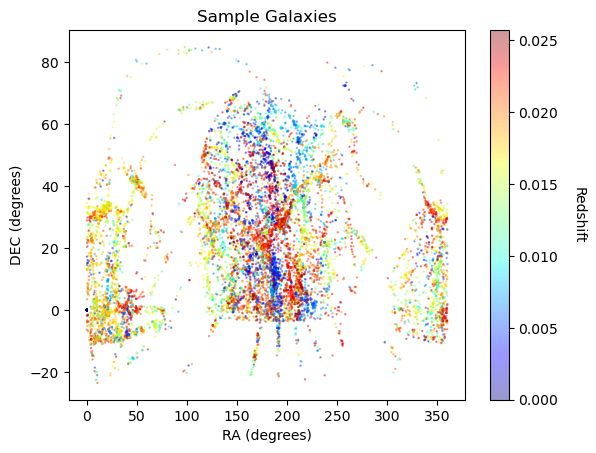

In [10]:
ra = cuttab['RA']
dec = cuttab['DEC']
ccode = cuttab['Z']

print(len(ra))
plt.scatter(ra,dec,c=ccode,cmap='jet',alpha=0.4,s=0.6)
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
#plt.xlim(110,260)
#plt.ylim(0,70)
cbar = plt.colorbar() # Adds a colorbar
cbar.set_label('Redshift',rotation=270,labelpad=20)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_5896\868878371.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(x),y,s=2,color='black')


12632


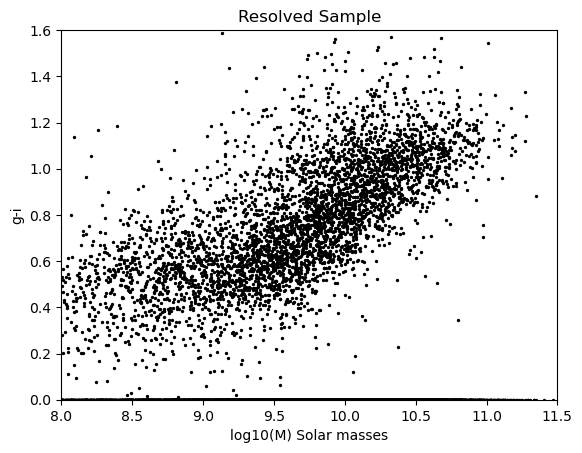

In [27]:
x = cuttab['MASS']
y = cuttab['gmi_corr'] #cuttab['gmag_corr']-cuttab['imag_corr']

#a, b = np.polyfit(x, y, 1)

plt.title('Resolved Sample')
plt.scatter(np.log10(x),y,s=2,color='black')
plt.ylim(0,1.6)
plt.xlim(8,11.5)
plt.xlabel('log10(M) Solar masses')
plt.ylabel('g-i')
print(len(cuttab['gmi_corr']))

#plt.plot(x, a*x+b)